# Introduction 

L'objectif du présent mandant est d'établir un modèle capable de détection les fraudes en assurance automobile. Les réclamations frauduleuses en assurance automobile représentent un enjeu important pour les assurances car en étant capable de les détecter elles pourraient éviter de débourser de gros montants pour du faux et avoir plus de ressources pour l'indemnisations des vraies réclamations.

In [53]:
# Valeurs manquantes 
import missingno as msno 

# Visualisation 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Traitement des données
import pandas as pd
import numpy as np

# Encodage 
from sklearn.preprocessing import LabelEncoder

# Gestion des Outliers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



# Algo de machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import lightgbm as lgb
import xgboost as xgb 
from catboost import CatBoostClassifier 

In [3]:
df = pd.read_csv("data/fraud_oracle.csv")
df.shape

(15420, 33)

In [4]:
pd.set_option("display.max_columns", None)

## Définition des variables 
- **Month** : Le mois dans lequel la réclamation d'assurance a été faite
- **WeekOfMonth** : La semaine du mois dans laquelle la réclamation a été faite
- **DayOfWeek** : Le jour de la semaine pour lequel la réclamation a été faite
- **Make** : La marque du véhicule assuré
- **AccidentArea** : L'aire dans laquelle l'accident a eu lieu
- **DayOfWeekClaimed** : Le jour de la semaine pour lequel la réclamation a été traitée
- **MonthClaimed** : Le mois pour lequel la réclamation a été traitée
- **WeekOfMonthClaimed** : La semaine du mois pour laquelle la réclamation a été traitée
- **Sex** : Le sexe de l'assuré
- **MaritalStatus** : Le statut matrimonial de l'assuré
- **Age** : l'age de l'assuré
- **Fault** : indique si l'assuré est le responsable de l'accident
- **PolicyType** : Le type d'asssurance souscrit
- **VehicleCategory** : La catégorie du véhicule (ex: SUV, sport...)
- **VehiclePrice** : Le prix du véhicule
- **FraudFound_P** : indique s'il y a eu une fraude pour la réclamation en question
- **PolicyNumber** : Identifiant unique pour chaque police
- **RepNumber** : Identifiant unique pour les réclamations
- **Deductible** : Le montant de la franchise à la charge de l'assuré avant que l'assureur ne paie pour une réclamation
- **DriverRating** : Niveau de conduite de l'assuré
- **Days_Policy_Claim** : Le nombre de jours de couverture de la police avant la réclamation
- **PastNumberOfClaims** : Le nombre de réclamations passées
- **AgeOfVehicle** : L'age du véhicule impliqué dans l'accident
- **AgeOfPolicyHolder** : L'age du titulaire de police
- **PoliceReportedFiled** : Indique s'il y a un rapport de police ou non
- **WitnessPresent** : Indique s'il y a des témoins ou non
- **AgentType** : Le type d'agent d'assurance qui a pris en charge la réclamation
- **NumberOfSuppliments** : Le nombre de documents supplémentaires ou réclamations reliée à la même réclamation
- **AdressChange_Claim** : Indique si l'adresse du titulaire de police a changé au moment de la réclamation
- **NumberOfCars** : Le nombre de véhicules assurés par la police
- **Year** : L'année dans laquelle la réclamation a été traitée
- **BasePolicy** : Les types de couvertures (ex: Responsabilité, colision, ....)

In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## Valeurs manquantes 

<Axes: >

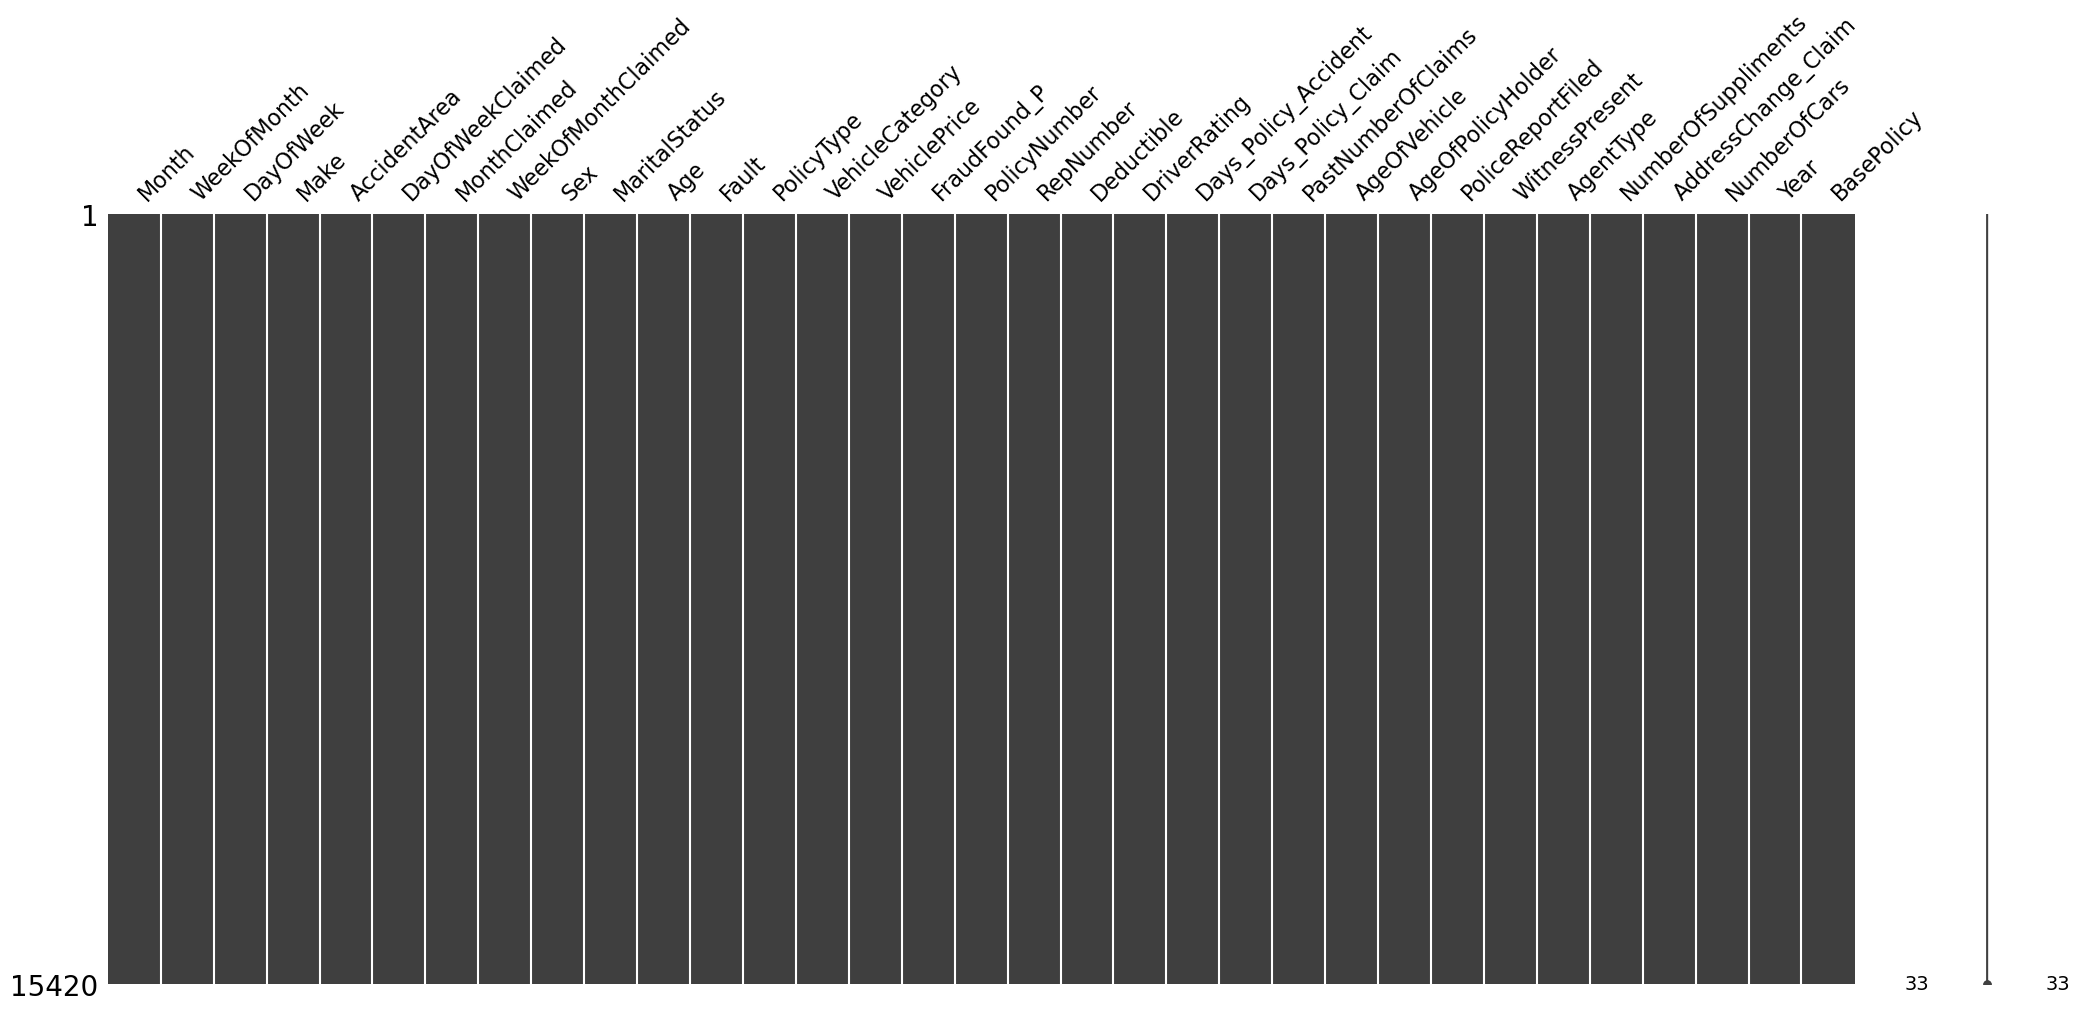

In [6]:
msno.matrix(df)

On ne note aucune valeur manquante dans les 33 variables.

## Résumés des données 

In [7]:
# Fonction pour obtenir les statistiques descriptives des variables des données
def summarize_df(Dataframe):

    summary = pd.DataFrame()

    # Type de données 
    summary["Data Type"] = Dataframe.dtypes

    # Nombre de valeur uniques
    summary["Unique values"] = Dataframe.nunique()

    # Les valeurs uniques 
    summary["Unique"] = Dataframe.apply(lambda x: x.unique().tolist())

    # Maximum
    summary["Max"] = Dataframe.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else "-")

    # Minimum 
    summary["Min"] = Dataframe.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else "-")

    # Moyenne, Médiane, Mode
    summary["Mean"] = Dataframe.apply(lambda x: round(x.mean(), 4) if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Median"] = Dataframe.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Mode"] = Dataframe.apply(lambda x: x.mode().iloc[0] if pd.api.types.is_numeric_dtype(x) else "-")

    # Mesures de dispersion
    summary["Range"] = Dataframe.apply(lambda x: x.max() - x.min() if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Variance"] = Dataframe.apply(lambda x: x.var() if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Range"] = Dataframe.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else "-")

    # Mesures de la forme de la distribution 
    summary["Skewness"] = Dataframe.apply(lambda x: round(x.skew(), 4) if pd.api.types.is_numeric_dtype(x) else "-")
    summary["Kurtosis"] = Dataframe.apply(lambda x: round(x.kurt(), 4) if pd.api.types.is_numeric_dtype(x) else "-")

    return summary

In [8]:
summary = summarize_df(df)
summary

,Data Type,Unique values,Unique,Max,Min,Mean,Median,Mode,Range,Variance,Skewness,Kurtosis
Month,object,12,"[Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, ...",-,-,-,-,-,-,-,-,-
WeekOfMonth,int64,5,"[5, 3, 2, 4, 1]",5,1,2.7886,3.0,3,1.287585,1.657876,0.1154,-1.1012
DayOfWeek,object,7,"[Wednesday, Friday, Saturday, Monday, Tuesday,...",-,-,-,-,-,-,-,-,-
Make,object,19,"[Honda, Toyota, Ford, Mazda, Chevrolet, Pontia...",-,-,-,-,-,-,-,-,-
AccidentArea,object,2,"[Urban, Rural]",-,-,-,-,-,-,-,-,-
DayOfWeekClaimed,object,8,"[Tuesday, Monday, Thursday, Friday, Wednesday,...",-,-,-,-,-,-,-,-,-
MonthClaimed,object,13,"[Jan, Nov, Jul, Feb, Mar, Dec, Apr, Aug, May, ...",-,-,-,-,-,-,-,-,-
WeekOfMonthClaimed,int64,5,"[1, 4, 2, 3, 5]",5,1,2.694,3.0,2,1.259115,1.585371,0.1582,-1.0856
Sex,object,2,"[Female, Male]",-,-,-,-,-,-,-,-,-
MaritalStatus,object,4,"[Single, Married, Widow, Divorced]",-,-,-,-,-,-,-,-,-


- Les variables "MonthClaimed" et "DayOfWeekClaimed" qui devraient compter respectivement 12 et 7 modalités comptent 13 et 8 modalités due à la présence de 0 dans les observations
- Les variables comprenant 2 modalités peuvent être recoder en variables binaires : "Sex", "PoliceReportFiled", "WitnessPresent", "AccidentalArea", "Fault", "AgentType"
- On note un age minimum de 0 qu'il faudra traiter
- On peut supprimer "PolicyNumber" étant donné qu'elle ne fournit pas d'information sur un potentiel de fraude

## Analyse exploratoire des données 

In [9]:
df_1 = df.copy()

### Variable dépendante - Fraud_Found_P 

In [10]:
# Comptage du nombre de cas de fraude
fraud_counts = df_1["FraudFound_P"].value_counts().reset_index()
fraud_counts.columns = ["FraudFound_P", "Count"]
fraud_counts

,FraudFound_P,Count
0,0,14497
1,1,923


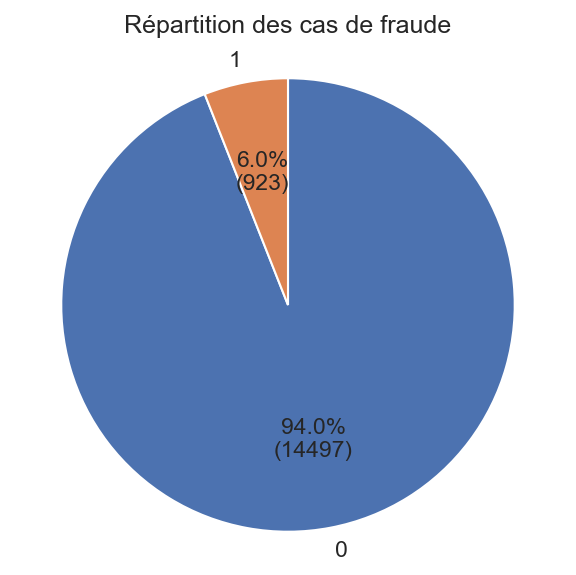

In [11]:
sns.set_theme(style="whitegrid")  

labels = fraud_counts["FraudFound_P"].astype(str)
sizes  = fraud_counts["Count"].to_numpy()

# Fonction d'affichage
def autopct_format(values):
    total = values.sum()
    def _fmt(pct):
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count})"
    return _fmt

# Graphique
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
ax.pie(
    sizes,
    labels=labels,
    autopct=autopct_format(sizes),
    startangle=90,
    counterclock=False,
    wedgeprops=dict(linewidth=1, edgecolor="white"),
    textprops=dict(fontsize=11),
)
ax.axis("equal")  # cercle parfait
ax.set_title("Répartition des cas de fraude", pad=12)
plt.tight_layout()
plt.show()

On note qu'il y a très peu de cas de fraudes dans nos données. Cela pourrait induire un biais dans le modèle pour la classe majoritaire et donc une faible performance pour la classe minoritaire. Les métriques comme la précision pourrait ne pas être vraiment utiles car une haute précision pourrait être due à une bonne prédiction de la classe majoritaire. 




### Fraude et Sexe 

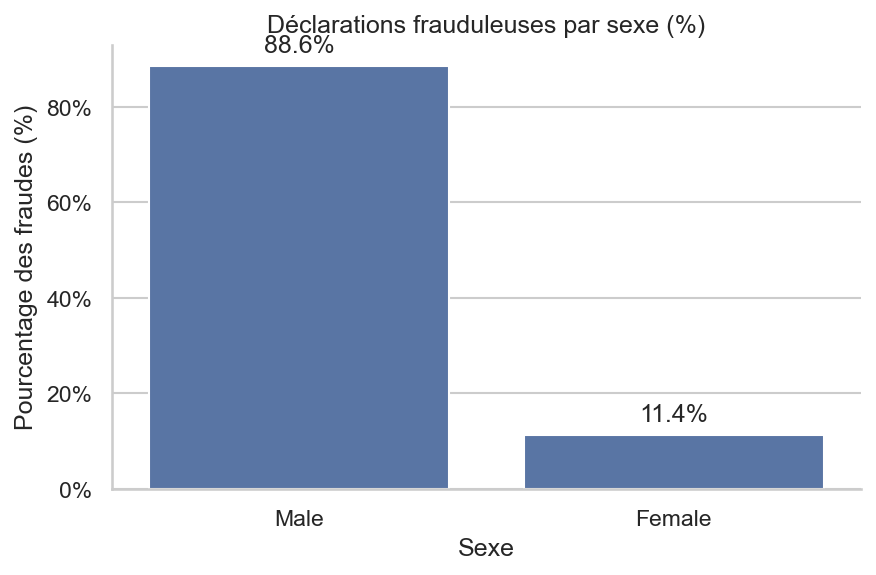

In [12]:
# Déclarations frauduleuses
df_fraud = df_1[df_1["FraudFound_P"] == 1]

# Distribution par sexe
fraud_counts_sex = df_fraud["Sex"].value_counts()
fraud_percentages_sex = (fraud_counts_sex / fraud_counts_sex.sum()) * 100
fraud_percentages_sex

# Transformation de la série en dataframe
plot_df = fraud_percentages_sex.rename_axis("Sex").reset_index(name="Percent")


# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=plot_df, x="Sex", y="Percent")

ax.yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Sexe")
ax.set_ylabel("Pourcentage des fraudes (%)")
ax.set_title("Déclarations frauduleuses par sexe (%)")

# Annotations sur chaque barre
for p in ax.patches:
    val = p.get_height()
    ax.annotate(f"{val:.1f}%",
               (p.get_x() + p.get_width() / 2, val),
               ha="center", va="bottom",
               xytext=(0,4), textcoords="offset points")

sns.despine()
plt.tight_layout()
plt.show()

L'analyse de ce graphique montre que les hommes sont significativement plus impliqués dans les cas de réclamations frauduleuses que les femmes.

### Fraude et variables d'âge 

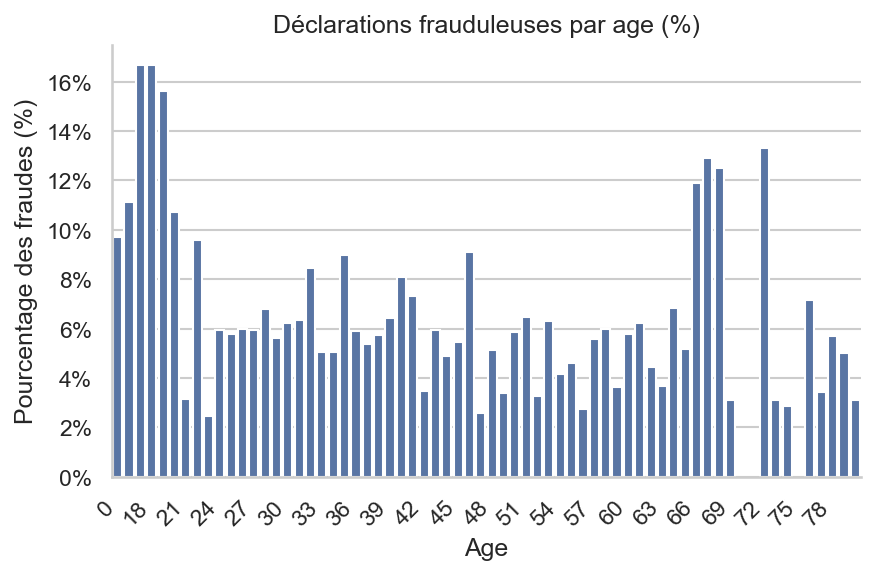

In [13]:
df_fraud = df_1[df_1["FraudFound_P"] == 1]
df_non_fraud = df_1[df_1["FraudFound_P"] == 0]

# Compter le nombre d'observations par âge
df_counts_age = df_1["Age"].value_counts().sort_index()
df_counts_fraud = df_fraud["Age"].value_counts().sort_index()

# Pourcentage de cas frauduleux par âge 
df_percentages_age_fraud = round((df_counts_fraud / df_counts_age) * 100, 2)


# dataframe
plot_df = df_percentages_age_fraud.rename_axis("Age").reset_index(name="Percent")
plot_df

# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=plot_df, x="Age", y="Percent")

step = max(1, len(plot_df) // 20)
ax.set_xticks(range(0, len(plot_df), step))
ax.set_xticklabels(plot_df["Age"].iloc[::step].astype(str), rotation=45, ha="right")

ax.yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Age")
ax.set_ylabel("Pourcentage des fraudes (%)")
ax.set_title("Déclarations frauduleuses par age (%)")

sns.despine()
plt.tight_layout()
plt.show()

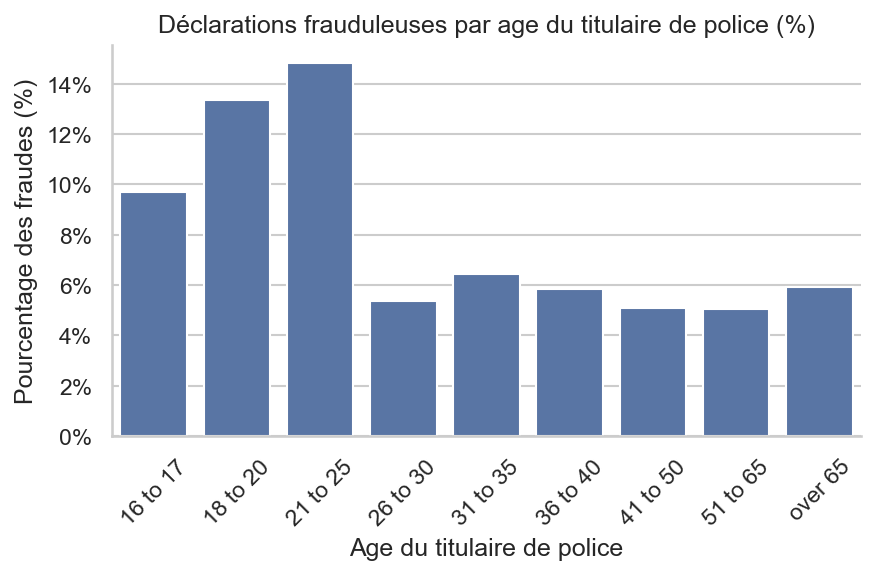

In [14]:
df_fraud = df_1[df_1["FraudFound_P"] == 1]
df_non_fraud = df_1[df_1["FraudFound_P"] == 0]

# Compter le nombre d'observations par âge
df_counts_age = df_1["AgeOfPolicyHolder"].value_counts().sort_index()
df_counts_fraud = df_fraud["AgeOfPolicyHolder"].value_counts().sort_index()

# Pourcentage de cas frauduleux par âge 
df_percentages_age_fraud = round((df_counts_fraud / df_counts_age) * 100, 2)


# dataframe
plot_df = df_percentages_age_fraud.rename_axis("Age du titulaire").reset_index(name="Percent")
plot_df

# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=plot_df, x="Age du titulaire", y="Percent")
ax.tick_params(axis="x", labelrotation=45)


ax.yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Age du titulaire de police")
ax.set_ylabel("Pourcentage des fraudes (%)")
ax.set_title("Déclarations frauduleuses par age du titulaire de police (%)")

sns.despine()
plt.tight_layout()
plt.show()

Le premier graphique (la répartition par âge exact) montre la même tendance avec plus de bruit par année que le second graphique (par classe d'âge) qui est lisse et rend le signal plus clair. Dans ces données, la proportion de déclarations frauduleuses atteint un maximum chez les jeunes adultes (18 à 25 ans avec des proportions entre 13% et 15%) avec un niveau déjà elevé chez les adolescents, puis décroît nettement pour se stabiliser autour de 5-6% entre 26 et 65 ans. Au delà de 65 ans, on note une légère remontée.

La présence prépondérante de fraudes chez les jeunes pourraient être dû à leurs finances faibles étant donné qu'ils n'ont pas encore commencé à travailler ou à pleinement gagner leurs vies. Chez les vieux de plus de 65 ans, l'entrée à l'âge de la retraite est suivie d'une diminution des sources de revenues. En considérant ces hypothèses, il pourrait y avoir un lien entre la fraude et le revenu.

### Fraude et marque de véhicule

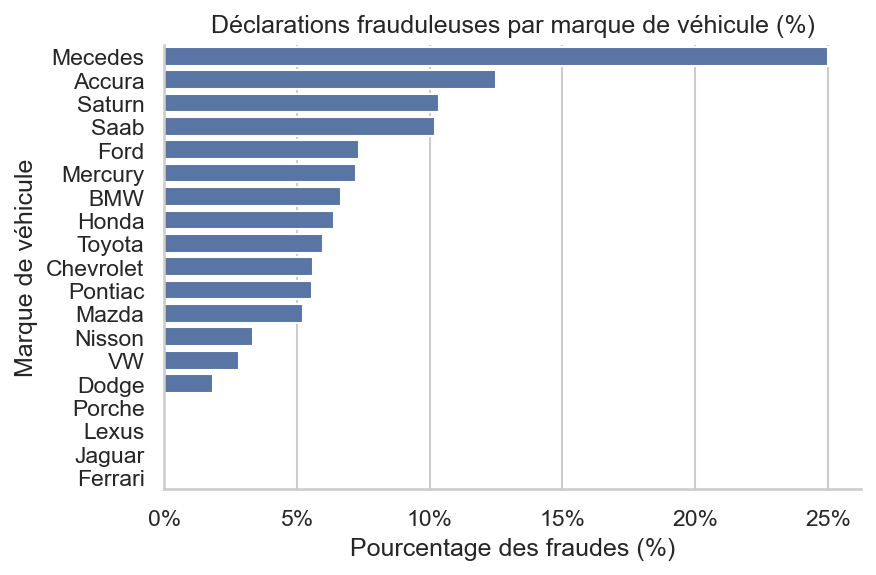

In [15]:
# Préparation des données pour visualisation
df_counts_make = df_1["Make"].value_counts().sort_index()
df_counts_make_fraud = df_fraud["Make"].value_counts().sort_index()
df_pertcentage_make_fraud = pd.DataFrame(round((df_counts_make_fraud / df_counts_make) * 100, 2)).fillna(0).reset_index()

df_pertcentage_make_fraud.columns = ["Make", "Fraud %"]
df_pertcentage_make_fraud = df_pertcentage_make_fraud.sort_values(by=["Fraud %", "Make"], ascending=False)

# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=df_pertcentage_make_fraud, x="Fraud %", y="Make")

ax.xaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Pourcentage des fraudes (%)")
ax.set_ylabel("Marque de véhicule")
ax.set_title("Déclarations frauduleuses par marque de véhicule (%)")

sns.despine()
plt.tight_layout()
plt.show()

Le graphique indique que la proportion de réclamations frauduleuses varie sensiblement selon la marque: **Mercedes** arrive nettement en tête, suivie de **Accura** puis d'un groupe intermétaire composé de **Saturn**, **Saab**, **Ford**, **Mercury** et **BMW**. Les marques les plus courantes comme **Honda**, **Toyota**, **Chevrolet**, **Pontiac**, **Mazda** et **Nisson** ont des proportions plus petite et décroissantes. Les marques plus de luxes comme **Porche**, **Lexus**, **Jaguar** et **Ferrari** affichent des taux nuls.

On pourrait donc penser que pour les marques coûteuses comme **Mercedes** mais quand même assez présente sur le marché, les propriétaires ont plus tendance à frauder. Pour les véhicules dits "de tous les jours" les déclarations frauduleuses sont quand même constantes entre 5-7%. Par contre pour des marques plus luxueuses, on a pratiquement pas de fraudes ce qui peut être traduit par une faible utilisation de ces véhicules (moins exposés au risques d'accient), au coût potentiel de réparation (la valeur marchande étant très haute, on s'attend à avoir une prime élevée et un traitement plus rigoureux des réclamations, de quoi décourager les potentiels fraudeurs). 

###  Fraude et prix du véhicule 

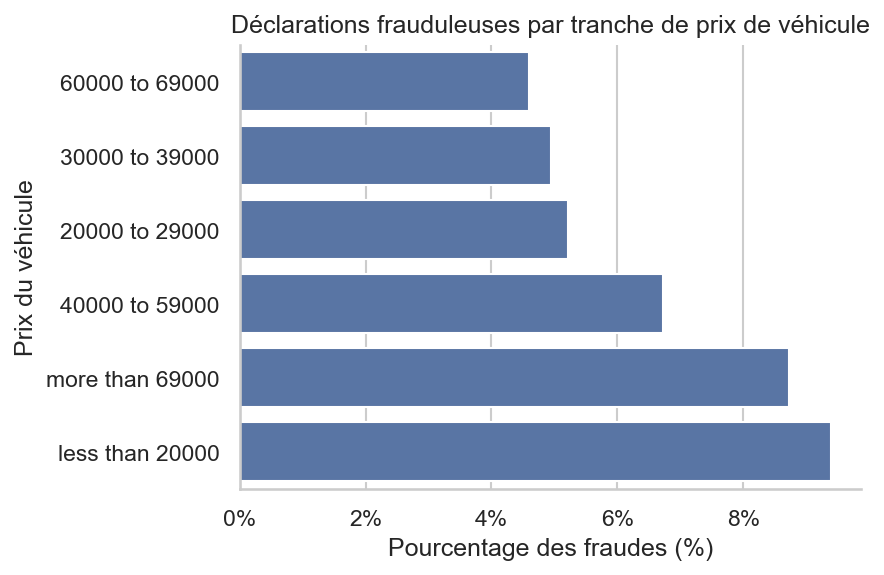

In [16]:
# Distribution des prix de véhicules 
df_counts_vp = df_1["VehiclePrice"].value_counts().sort_index()
df_counts_fraud_vp = df_fraud["VehiclePrice"].value_counts().sort_index()

# Pourcentages de fraud
df_percentages_fraud_vp = pd.DataFrame(round((df_counts_fraud_vp / df_counts_vp) * 100, 2)).fillna(0).reset_index()
df_percentages_fraud_vp.columns = ["VehiclePrice", "Fraud %"]
df_percentages_fraud_vp = df_percentages_fraud_vp.sort_values(by=["Fraud %"])

# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=df_percentages_fraud_vp, x="Fraud %", y="VehiclePrice")

ax.xaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Pourcentage des fraudes (%)")
ax.set_ylabel("Prix du véhicule")
ax.set_title("Déclarations frauduleuses par tranche de prix de véhicule")

sns.despine()
plt.tight_layout()
plt.show()

On détecte de nombreux cas de fraude que ce soit dans les véhicules les moins chers et dans les véhicules les plus coûteux.

### Fraude et âge du véhicule

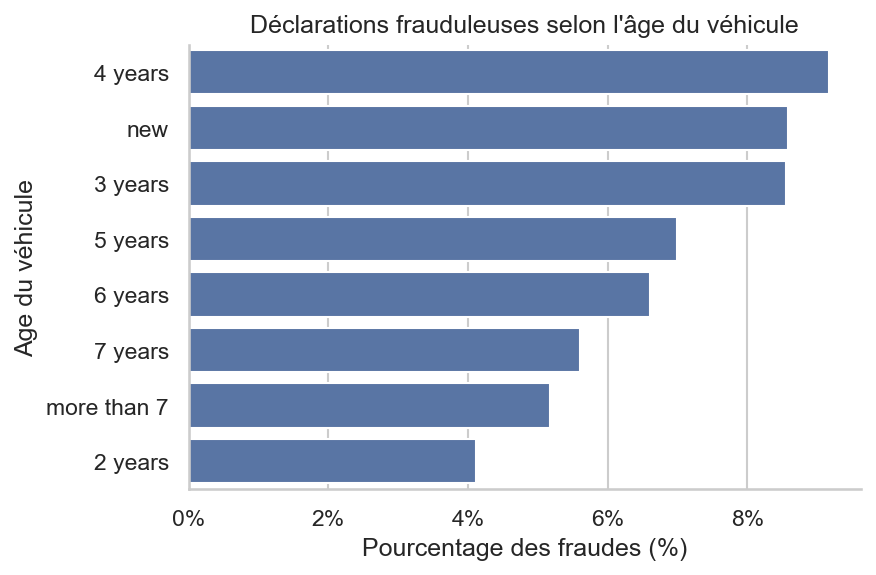

In [17]:
# Distribution des âges de véhicules
df_count_av = df_1["AgeOfVehicle"].value_counts().sort_index()
df_count_fraud_av = df_fraud["AgeOfVehicle"].value_counts().sort_index()

# Pourcentage de fraude
df_percentage_fraud_av = pd.DataFrame(round((df_count_fraud_av / df_count_av) * 100, 2)).fillna(0).reset_index()
df_percentage_fraud_av.columns = ["AgeOfVehicle", "Fraud %"]
df_percentage_fraud_av = df_percentage_fraud_av.sort_values(by=["Fraud %"], ascending=False)

# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=df_percentage_fraud_av, x="Fraud %", y="AgeOfVehicle")

ax.xaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Pourcentage des fraudes (%)")
ax.set_ylabel("Age du véhicule")
ax.set_title("Déclarations frauduleuses selon l'âge du véhicule")

sns.despine()
plt.tight_layout()
plt.show()

Ici, on ne peut pas dire que la fraude est fonction de l'âge du véhicule, mais on pourrait regrouper cette variable en différentes catégories de niveau de fraude:
- Level 1 : 2 ans et plus de 7 ans
- Level 2 : 5 à 7 ans
- Level 3 : Nouveau et 4 ans

### Fraude en fonction de la base de police et du type de police 

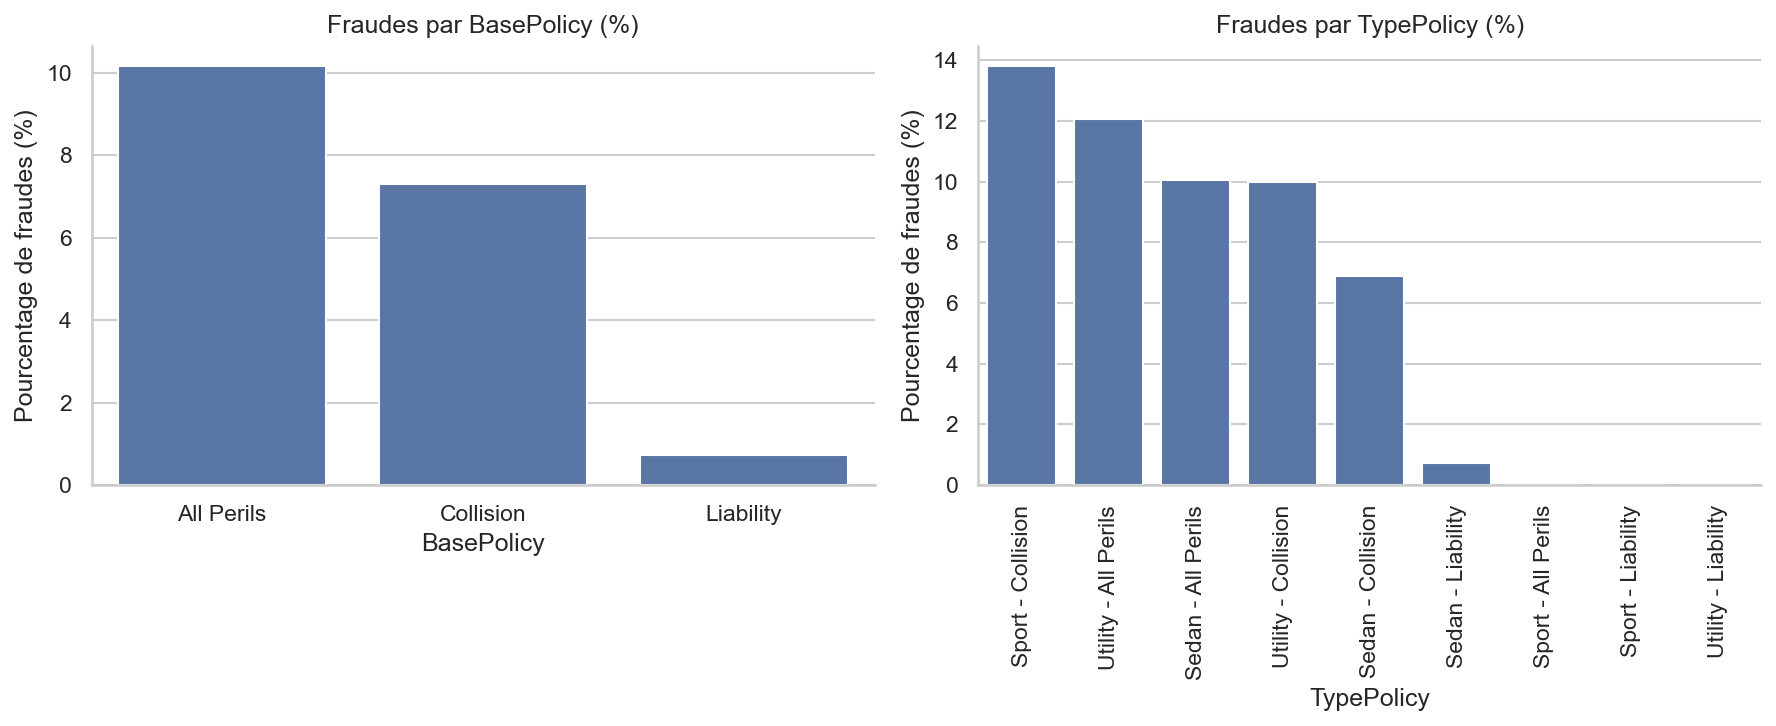

In [18]:
# Distribution de BasePolicy
df_count_bp = df_1["BasePolicy"].value_counts().sort_index()
df_count_fraud_bp = df_fraud["BasePolicy"].value_counts().sort_index()

# Pourcentage de fraude
df_percentage_fraud_bp = pd.DataFrame(round((df_count_fraud_bp / df_count_bp) * 100, 2)).fillna(0).reset_index()
df_percentage_fraud_bp.columns = ["BasePolicy", "Fraud %"]
df_percentage_fraud_bp = df_percentage_fraud_bp.sort_values(by=["Fraud %"], ascending=False)

# Distribution des TypePolicy
df_count_tp = df_1["PolicyType"].value_counts().sort_index()
df_count_fraud_tp = df_fraud["PolicyType"].value_counts().sort_index()

# Pourcentage de fraude
df_percentage_fraud_tp = pd.DataFrame(round((df_count_fraud_tp / df_count_tp) * 100, 2)).fillna(0).reset_index()
df_percentage_fraud_tp.columns = ["PolicyType", "Fraud %"]
df_percentage_fraud_tp = df_percentage_fraud_tp.sort_values(by=["Fraud %"], ascending=False)


# --- Barplots côte à côte ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# BasePolicy
sns.barplot(data=df_percentage_fraud_bp, y="Fraud %", x="BasePolicy", ax=axes[0])
axes[0].set_title("Fraudes par BasePolicy (%)")
axes[0].set_ylabel("Pourcentage de fraudes (%)")
axes[0].set_xlabel("BasePolicy")

# TypePolicy
sns.barplot(data=df_percentage_fraud_tp, y="Fraud %", x="PolicyType", ax=axes[1])
axes[1].set_title("Fraudes par TypePolicy (%)")
axes[1].set_ylabel("Pourcentage de fraudes (%)")
axes[1].set_xlabel("TypePolicy")
axes[1].tick_params(axis="x", labelrotation=90)

sns.despine()
plt.tight_layout()
plt.show()

D’abord, les polices offrant une protection étendue, comme All Perils et Collision, affichent des taux de fraude nettement plus élevés que les polices de responsabilité seule. Ce résultat s’explique par les incitations financières associées : plus la couverture est large, plus le potentiel de remboursement est important, ce qui accroît l’attrait de la fraude. Ensuite, en croisant cette lecture avec le type de véhicule assuré, on observe que les véhicules sportifs et utilitaires sont davantage associés aux fraudes, particulièrement lorsqu’ils sont couverts par des garanties Collision ou All Perils. Ces résultats suggèrent que la fraude est fortement liée à la valeur perçue des indemnisations possibles et aux caractéristiques des véhicules.

### Fraude en fonction du mois de réclamation et du mois de paiement

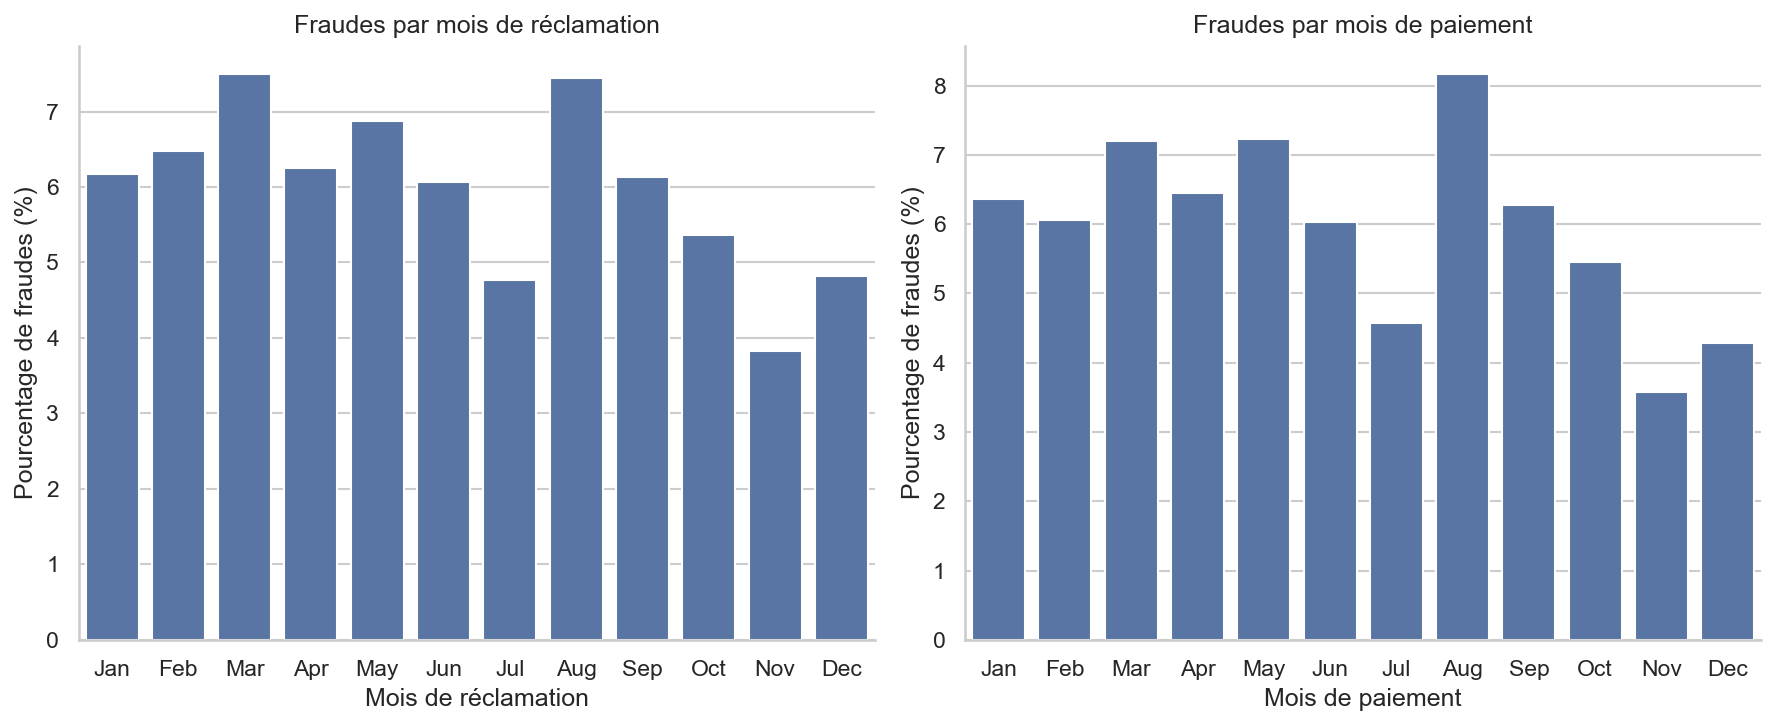

In [19]:
# Distribution de Month
df_count_m = df_1["Month"].value_counts().sort_index()
df_count_fraud_m = df_fraud["Month"].value_counts().sort_index()

# Pourcentage de fraude
df_percentage_fraud_m = pd.DataFrame(round((df_count_fraud_m / df_count_m) * 100, 2)).fillna(0).reset_index()
df_percentage_fraud_m.columns = ["Month", "Fraud %"]

# Distribution des MonthClaimed
df_count_mc = df_1["MonthClaimed"].value_counts().sort_index()
df_count_fraud_mc = df_fraud["MonthClaimed"].value_counts().sort_index()

# Pourcentage de fraude
df_percentage_fraud_mc = pd.DataFrame(round((df_count_fraud_mc / df_count_mc) * 100, 2)).fillna(0).reset_index()
df_percentage_fraud_mc.columns = ["MonthClaimed", "Fraud %"]

# Orde de mois 
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# --- Barplots côte à côte ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# BasePolicy
sns.barplot(data=df_percentage_fraud_m, y="Fraud %", x="Month", ax=axes[0], order=month)
axes[0].set_title("Fraudes par mois de réclamation")
axes[0].set_ylabel("Pourcentage de fraudes (%)")
axes[0].set_xlabel("Mois de réclamation")

# TypePolicy
sns.barplot(data=df_percentage_fraud_mc, y="Fraud %", x="MonthClaimed", ax=axes[1], order=month)
axes[1].set_title("Fraudes par mois de paiement")
axes[1].set_ylabel("Pourcentage de fraudes (%)")
axes[1].set_xlabel("Mois de paiement")

sns.despine()
plt.tight_layout()
plt.show()

La variable Month influence légèrement la répartition des fraudes, mais les variations ne sont pas suffisamment marquées ni régulières pour en faire un indicateur déterminant. Le mois de réclamation ou de paiement n’apparaît pas comme une variable significative pour la détection de fraude à lui seul, mais il peut contribuer comme variable secondaire dans un modèle multivarié.

### Fraude et zone d'accident 

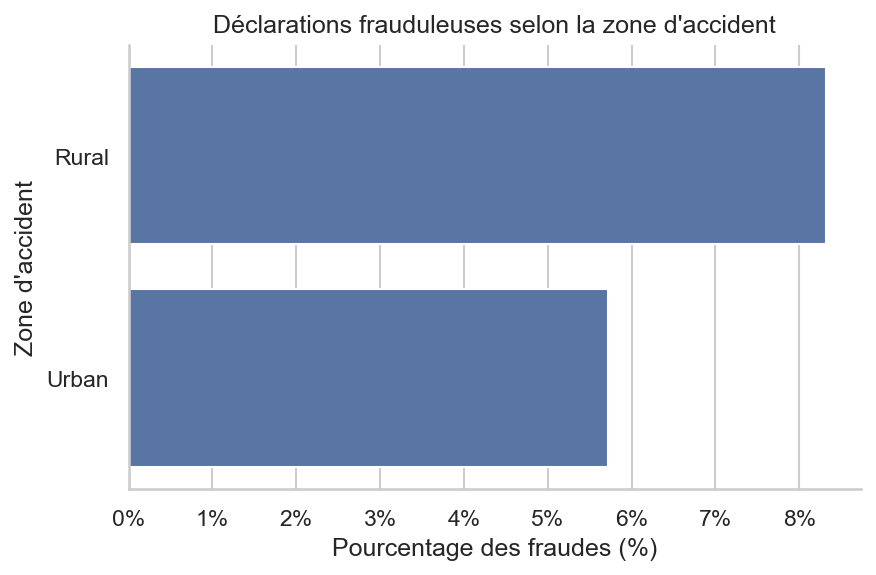

In [20]:
# Distribution des âges de véhicules
df_count_aa = df_1["AccidentArea"].value_counts().sort_index()
df_count_fraud_aa = df_fraud["AccidentArea"].value_counts().sort_index()

# Pourcentage de fraude
df_percentage_fraud_aa = pd.DataFrame(round((df_count_fraud_aa / df_count_aa) * 100, 2)).fillna(0).reset_index()
df_percentage_fraud_aa.columns = ["AccidentArea", "Fraud %"]
df_percentage_fraud_aa = df_percentage_fraud_aa.sort_values(by=["Fraud %"], ascending=False)

# Barplot
plt.figure(figsize=(6, 4), dpi=150)
ax = sns.barplot(data=df_percentage_fraud_aa, x="Fraud %", y="AccidentArea")

ax.xaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Pourcentage des fraudes (%)")
ax.set_ylabel("Zone d'accident")
ax.set_title("Déclarations frauduleuses selon la zone d'accident")

sns.despine()
plt.tight_layout()
plt.show()

Les sinistres déclarés en milieu rural semblent plus susceptibles d’être frauduleux que ceux en milieu urbain. Cela peut s’expliquer par une surveillance moindre, un nombre réduit de témoins ou un contrôle plus difficile des circonstances de l’accident. La variable **AccidentArea** apparaît comme potentiellement significative pour la détection de fraude, car l’écart observé est non négligeable et reflète une tendance claire.

### Fraude et responsabilité de l'accident 

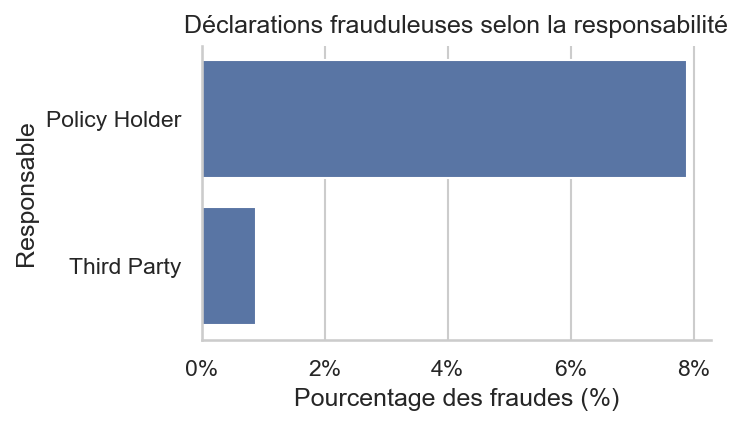

In [21]:
# Distribution des âges de véhicules
df_count_f = df_1["Fault"].value_counts().sort_index()
df_count_fraud_f = df_fraud["Fault"].value_counts().sort_index()

# Pourcentage de fraude
df_percentage_fraud_f = pd.DataFrame(round((df_count_fraud_f / df_count_f) * 100, 2)).fillna(0).reset_index()
df_percentage_fraud_f.columns = ["Fault", "Fraud %"]
df_percentage_fraud_f = df_percentage_fraud_f.sort_values(by=["Fraud %"], ascending=False)

# Barplot
plt.figure(figsize=(5, 3), dpi=150)
ax = sns.barplot(data=df_percentage_fraud_f, x="Fraud %", y="Fault")

ax.xaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Pourcentage des fraudes (%)")
ax.set_ylabel("Responsable")
ax.set_title("Déclarations frauduleuses selon la responsabilité")

sns.despine()
plt.tight_layout()
plt.show()

Les résultats indiquent que la responsabilité joue un rôle majeur dans la détection de la fraude : près de 8 % des déclarations frauduleuses proviennent directement des assurés eux-mêmes, contre à peine 1 % lorsqu’un tiers est responsable. Cet écart important suggère que les assurés ont davantage d’incitations financières à manipuler leur déclaration lorsqu'ils sont responsables, ce qui fait de la variable **Fault** un indicateur significatif et pertinent à intégrer dans un modèle de détection de fraude.

### Fraude et présence de témoins 

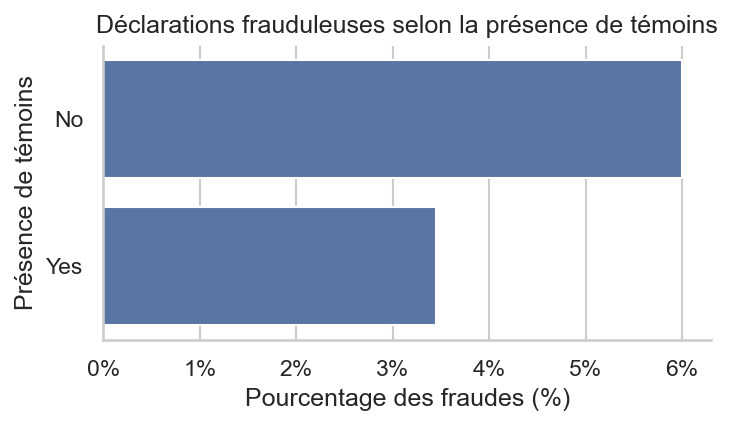

In [22]:
# Distribution des âges de véhicules
df_count_wp = df_1["WitnessPresent"].value_counts().sort_index()
df_count_fraud_wp = df_fraud["WitnessPresent"].value_counts().sort_index()

# Pourcentage de fraude
df_percentage_fraud_wp = pd.DataFrame(round((df_count_fraud_wp / df_count_wp) * 100, 2)).fillna(0).reset_index()
df_percentage_fraud_wp.columns = ["WitnessPresent", "Fraud %"]
df_percentage_fraud_wp = df_percentage_fraud_wp.sort_values(by=["Fraud %"], ascending=False)

# Barplot
plt.figure(figsize=(5, 3), dpi=150)
ax = sns.barplot(data=df_percentage_fraud_wp, x="Fraud %", y="WitnessPresent")

ax.xaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_xlabel("Pourcentage des fraudes (%)")
ax.set_ylabel("Présence de témoins")
ax.set_title("Déclarations frauduleuses selon la présence de témoins")

sns.despine()
plt.tight_layout()
plt.show()

On a environ 3.5% des cas frauduleux pour les cas avec témoins contre 6% de fraudes lorsqu'il n'y a pas de témoins. La présence de témoins n'empêche pas l'assuré de frauder mais on note une différence significative entre les deux proportions ce qui indiquent les titulaires de police ont plus tendance à frauder lorsqu'il n'y a pas de témoins.

### Fraude et niveau de conduite 

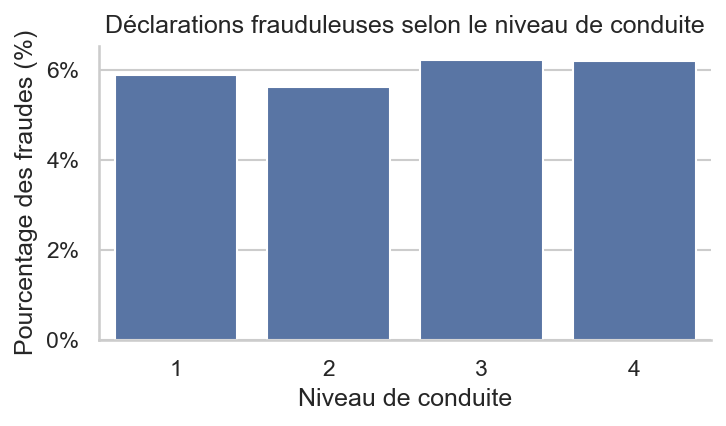

In [23]:
# Distribution des âges de véhicules
df_count_dr = df_1["DriverRating"].value_counts().sort_index()
df_count_fraud_dr = df_fraud["DriverRating"].value_counts().sort_index()

# Pourcentage de fraude
df_percentage_fraud_dr = pd.DataFrame(round((df_count_fraud_dr / df_count_dr) * 100, 2)).fillna(0).reset_index()
df_percentage_fraud_dr.columns = ["DriverRating", "Fraud %"]
df_percentage_fraud_dr = df_percentage_fraud_dr.sort_values(by=["Fraud %"], ascending=False)

# Barplot
plt.figure(figsize=(5, 3), dpi=150)
ax = sns.barplot(data=df_percentage_fraud_dr, y="Fraud %", x="DriverRating")

ax.yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
ax.set_ylabel("Pourcentage des fraudes (%)")
ax.set_xlabel("Niveau de conduite")
ax.set_title("Déclarations frauduleuses selon le niveau de conduite")

sns.despine()
plt.tight_layout()
plt.show()

On observe pas vraiement de différence significative dans la distribution des cas de fraude selon le niveau de conduite. Cette variable ne sera vraisemblablement utile pour détecter les cas de fraude.

### Fraude et les autres variables explicatives

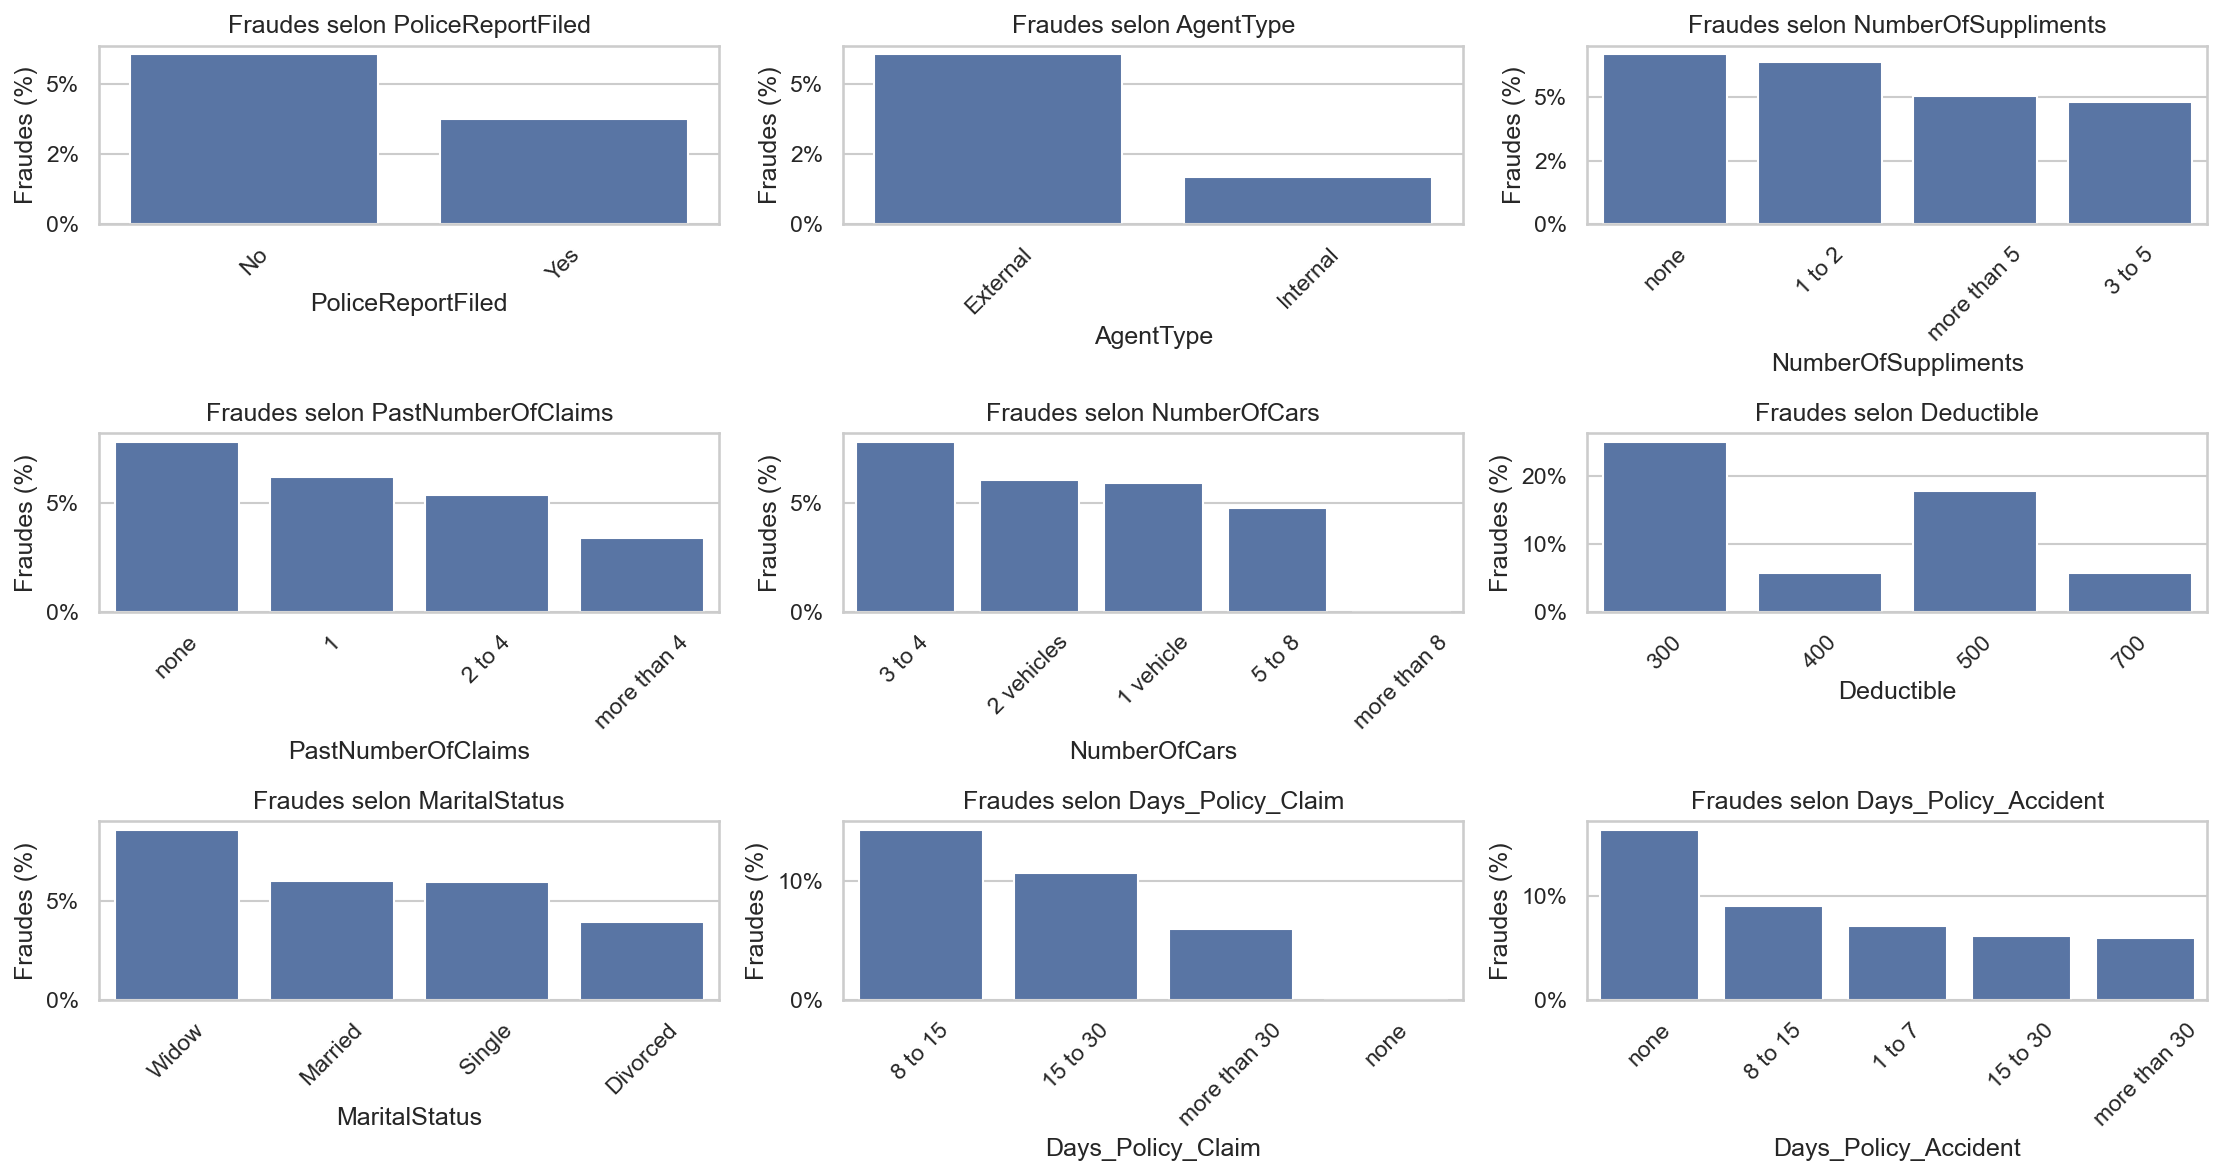

In [24]:
# Variables à analyser
var = ["PoliceReportFiled", "AgentType", "NumberOfSuppliments", 
       "PastNumberOfClaims", "NumberOfCars", "Deductible", "MaritalStatus",
      "Days_Policy_Claim", "Days_Policy_Accident"]

# Traitement 
df_viz = df_1.copy()
df_viz["Deductible"] = df_1["Deductible"].astype(str)

# Création de la grille 
fig, axes = plt.subplots(3, 3, figsize=(15, 8), dpi=150)
axes = axes.flatten()

# Boucle sur chaque variable
for i, v in enumerate(var):
    # Comptage global et frauduleux
    df_count = df_1[v].value_counts().sort_index()
    df_count_fraud = df_fraud[v].value_counts().sort_index()

    # Pourcentage de fraude
    df_percentage_fraud = pd.DataFrame(
        round((df_count_fraud / df_count) * 100, 2)
    ).fillna(0).reset_index()

    df_percentage_fraud.columns = [v, "Fraud %"]
    df_percentage_fraud = df_percentage_fraud.sort_values(by="Fraud %", ascending=False)

    # Barplot dans la grille
    sns.barplot(data=df_percentage_fraud, x=v, y="Fraud %", ax=axes[i])
    axes[i].yaxis.set_major_formatter(PercentFormatter(xmax=100, decimals=0))
    axes[i].set_ylabel("Fraudes (%)")
    axes[i].set_xlabel(v)
    axes[i].set_title(f"Fraudes selon {v}")
    axes[i].tick_params(axis="x", rotation=45)

# Supprimer éventuelle case vide si nb variables < nb cases
for j in range(len(var), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **PoliceReportFiled**. Les déclarations sans dépôt de rapport de police présentent le taux de fraude le plus élevé (≈6 %), signe qu’un moindre niveau de traçabilité et de vérification facilite les tentatives de fraude. À l’inverse, la présence d’un rapport officiel réduit nettement ce taux, probablement grâce au contrôle documentaire et aux risques accrus de détection.
- **AgentType**. Les contrats issus d’agents externes affichent un taux de fraude sensiblement supérieur (≈6 %) à ceux gérés par des agents internes (≈1,5 %). 
- **NumberOfSuppliments**. On observe une fraude un peu plus élevée lorsqu’aucun supplément n’est déclaré, puis des niveaux proches (5–6 %) pour les autres classes. Le signal existe mais reste modéré : cette variable seule discrimine peu, surtout sans tenir compte des montants et de la nature des suppléments.
- **PastNumberOfClaims**. Paradoxalement, les assurés sans antécédents présentent le taux de fraude le plus élevé (≈8 %), alors que le risque décroît avec le nombre de réclamations passées. Cela peut traduire un biais de sélection (nouveaux assurés moins connus) ou des comportements opportunistes ponctuels.
- **NumberOfCars**. Le risque augmente pour les portefeuilles comportant 3 à 4 véhicules (≈8 %), puis baisse au-delà. La multiplicité de véhicules accroît les occasions de sinistre (et donc de fraude), mais les très grands parcs semblent plus surveillés et professionnalisés.
- **Deductible**. Les franchines des différents contrats sont 300, 400, 500, 700. On note une différence significative dans la distribution des cas de fraudes mais cette différence n'évolue pas en fonction du montant.
- **MaritalStatus**. On note plus de cas de fraudes chez les veufs/veuves. Les mariés et les célibataires présentent des taux pratiquement similaires. On pourrait regrouper ces 2 modalités.
- **Days_Policy_Claim**. Plus une réclamation est faite tôt après l'entrée en vigueur de la police, plus cette reclamation est susceptible d'être une fraude.
- **Days_Policy_Accident**. On note la même tendance qu'avzc **Days_Policy_Claim** mais les cas inconnus représentent le groupe avec le plus de cas de fraude.

Les variables les plus discriminantes pour la détection de fraude sont PoliceReportFiled et AgentType (écarts nets et cohérents). PastNumberOfClaims et NumberOfCars apportent un signal utile mais contextuel, tandis que NumberOfSuppliments est faiblement informatif seul. 

## Prétraitement des données 

In [25]:
df_clean = df.copy()
df_clean.shape

(15420, 33)

### Encodage des variables binaires
AccidentArea, Sex, Fault, PoliceReporteFiled, WitnessPresent, AgentType

In [26]:
# Sélection des variables binaires
binary_columns = [col for col in df_clean.columns if df_clean[col].nunique() == 2 and col != "FraudFound_P"]
print("Le nombre de variables binaires : ", len(binary_columns))
print("Variables binaires : ", binary_columns)

Le nombre de variables binaires :  6
Variables binaires :  ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']


In [27]:
le = LabelEncoder()

for col in binary_columns:
    df_clean[col] = le.fit_transform(df_clean[col])
    print("Labl mapping: ", dict(zip(le.classes_, le.transform(le.classes_))))

Labl mapping:  {'Rural': np.int64(0), 'Urban': np.int64(1)}
Labl mapping:  {'Female': np.int64(0), 'Male': np.int64(1)}
Labl mapping:  {'Policy Holder': np.int64(0), 'Third Party': np.int64(1)}
Labl mapping:  {'No': np.int64(0), 'Yes': np.int64(1)}
Labl mapping:  {'No': np.int64(0), 'Yes': np.int64(1)}
Labl mapping:  {'External': np.int64(0), 'Internal': np.int64(1)}


### Encodage des variables catégorielles ordinales et nominales 
Dans l'analyse exploratoire, on a décidé de regrouper les modalités des variables **VehiclePrice**, **AgeOfVehicle** pour représenter différents niveaux de fraude. Pour la variable **BasePolicy**, on peut la transformer en variable ordinale pour refléter les niveaux de protections offertes. 
- **VehiclePrice** est transformée en variable binaire au lieu d'une variable ordinale. Cela est dû que l'on notait des hauts taux de fraudes pour certaines modalités qui ne ne suivaient pas une évolution selon l'ordre.
- **AgeOfVehicle** est transformée en variable catégorielle pour la même raison que **VehiclePrice** en 3 catégories.
- **BasePolicy** garde quant à elle sa caractérisque de variable catégorielle ordinale.

In [28]:
# Liste des variables et modalités 
for col in ["VehiclePrice", "AgeOfVehicle", "BasePolicy"]:
    print(f"Les modalités dans {col} : {df_clean[col].unique()}")

Les modalités dans VehiclePrice : ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']
Les modalités dans AgeOfVehicle : ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
Les modalités dans BasePolicy : ['Liability' 'Collision' 'All Perils']


In [29]:
# Les différents niveaux de modalités 
vehicleprice_label = {"more than 69000": 1, "20000 to 29000": 0, "30000 to 39000": 0,
                     "les than 20000": 1, "40000 to 59000": 1, "60000 to 69000": 0}

ageofvehicle_label = {"new": 2, "2 years": 0, "3 years": 2, "4 years":2, "5 years": 1,
                     "6 years": 1, "7 years": 0, "more than 7": 0}

basepolicy_label = {"Liability": 0, "Collision": 1, "All Perils": 2}

In [31]:
# Transformation 
df_clean['VehiclePrice'] = df_clean["VehiclePrice"].map(vehicleprice_label)
df_clean['AgeOfVehicle'] = df_clean['AgeOfVehicle'].map(ageofvehicle_label)
df_clean['BasePolicy'] = df_clean['BasePolicy'].map(basepolicy_label)

In [32]:
df_clean2 = df_clean.copy()
df_clean2.shape

(15420, 33)

### Gestion de valeurs aberrante 

Comme on l'avait mentionné lors de l'analyse descriptive des variables, il n'est pas normal d'avoir des âges de 0. Il semble également avoir des outliers au delà de 75 ans. On va donc utiliser une méthode d'imputation par arbres aléatoires pour régler ces cas.

In [36]:
num_to_str = ["RepNumber", "Deductible", "Year"]

for col in num_to_str:
    df_clean2[col] = df_clean2[col].astype(str)

In [34]:
var_cat = ["Make", "MaritalStatus", "PolicyType", "VehicleCategory", "RepNumber",
          "Deductible", "Days_Policy_Accident", "Days_Policy_Claim", "PastNumberOfClaims", "AgeOfPolicyHolder", "NumberOfSuppliments",
          "AddressChange_Claim", "NumberOfCars", "Year"]
print("Le nombre de variables à encoder : ", len(var_cat))

Le nombre de variables à encoder :  14


In [37]:
df_clean3 = pd.get_dummies(df_clean2, columns=var_cat)
df_clean3.shape

(15420, 113)

In [38]:
df_clean3.columns.to_list()

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'Age',
 'Fault',
 'VehiclePrice',
 'FraudFound_P',
 'PolicyNumber',
 'DriverRating',
 'AgeOfVehicle',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'BasePolicy',
 'Make_Accura',
 'Make_BMW',
 'Make_Chevrolet',
 'Make_Dodge',
 'Make_Ferrari',
 'Make_Ford',
 'Make_Honda',
 'Make_Jaguar',
 'Make_Lexus',
 'Make_Mazda',
 'Make_Mecedes',
 'Make_Mercury',
 'Make_Nisson',
 'Make_Pontiac',
 'Make_Porche',
 'Make_Saab',
 'Make_Saturn',
 'Make_Toyota',
 'Make_VW',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MaritalStatus_Widow',
 'PolicyType_Sedan - All Perils',
 'PolicyType_Sedan - Collision',
 'PolicyType_Sedan - Liability',
 'PolicyType_Sport - All Perils',
 'PolicyType_Sport - Collision',
 'PolicyType_Sport - Liability',
 'PolicyType_Utility - All Perils',
 'PolicyType_Utility - Collision',
 'PolicyType_Utility - Liability

Text(0.5, 1.0, "Boxplot de l'âge")

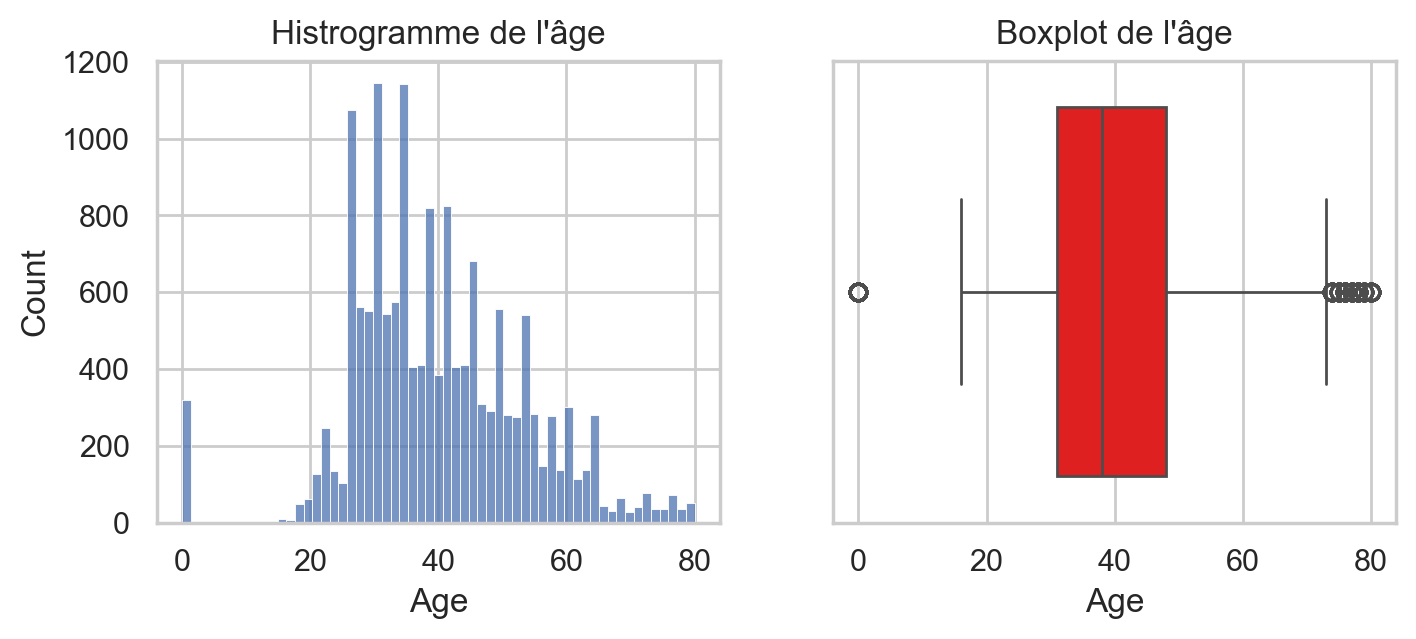

In [39]:
# Création de la grille 
fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
axes = axes.flatten()

# Histogramme
sns.histplot(data=df_clean3, x="Age", ax=axes[0])
axes[0].set_title("Histrogramme de l'âge")

# Boxplot
sns.boxplot(data=df_clean3, x="Age", ax=axes[1], color="red")
axes[1].set_title("Boxplot de l'âge")

In [59]:
# Imputation des Outliers en utilisant LightGBM
def lightgbm_imputation(dataframe, var):
    df = dataframe.copy()
    # On s'entraine sur les données dont l'âge n'est pas nulle
    train_data = df[df[var].notnull()]
    # On fait la prédiction sur les valeurs nulles
    test_data = df[df[var].isnull()]

    X_train = train_data.drop(columns=[var], axis=1)
    y_train = train_data[var]
    X_test = test_data.drop(columns=[var], axis=1)

    train_dataset = lgb.Dataset(X_train, label=y_train)

    params = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": "gbdt",
        "verbose": -1
    }

    model = lgb.train(params, train_dataset, num_boost_round=100)

    pred = model.predict(X_test)

    df.loc[df_clean3[var].isnull(), var] = pred

    return df

In [62]:
# Changer les 0 et les outliers en valeurs manquantes
df_clean3["Age"] = df_clean3["Age"].apply(lambda x: np.nan if x == 0 or x > 74 else x)

In [63]:
# Application de la méthode d'imputation 
to_delete = ["Month", "DayOfWeek", "DayOfWeekClaimed", "MonthClaimed"]
df_drop = df_clean3.drop(to_delete, axis=1)
df_imputed = lightgbm_imputation(df_drop, "Age")

Text(0.5, 1.0, "Boxplot de l'âge")

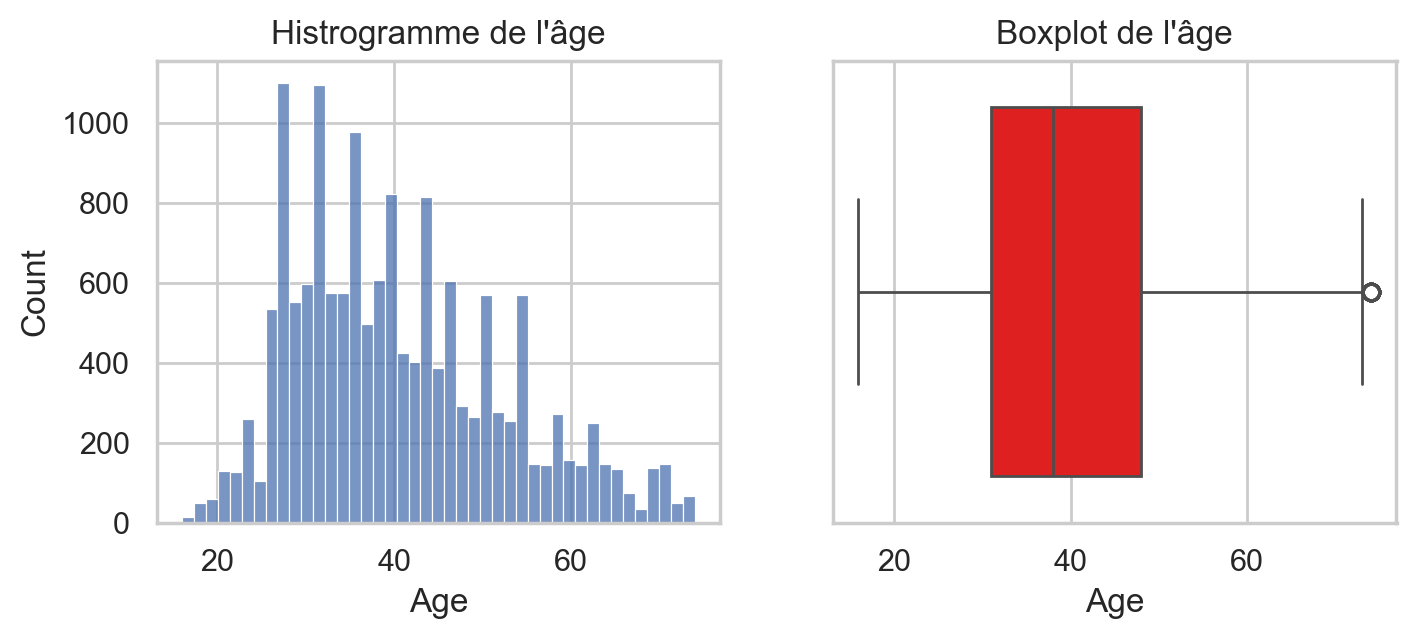

In [64]:
# Création de la grille 
fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
axes = axes.flatten()

# Histogramme
sns.histplot(data=df_imputed, x="Age", ax=axes[0])
axes[0].set_title("Histrogramme de l'âge")

# Boxplot
sns.boxplot(data=df_imputed, x="Age", ax=axes[1], color="red")
axes[1].set_title("Boxplot de l'âge")

In [65]:
df_clean2["Age"] = df_clean3["Age"]
df_clean2.shape

(15420, 33)

### Suppression des variables inutiles 

In [66]:
var_drop = ["WeekOfMonth", "DayOfWeek", "DayOfWeekClaimed", "WeekOfMonthClaimed", "PolicyNumber", "MonthClaimed"]
df_clean4 = df_clean2.drop(columns=var_drop, axis=1)
df_clean4.shape

(15420, 27)

## Réduction de la dimension des données 